In [45]:
from pprint import pprint
import re
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from env import get_db_url
from sklearn.tree import plot_tree
import acquire as a
import prepare as p

In [3]:
url = get_db_url('spam_db')
df = pd.read_sql('SELECT * FROM spam', url)
df

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...
5568,5568,ham,Will Ì_ b going to esplanade fr home?
5569,5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [13]:
df['clean_text'] = df.text.apply(clean).apply(' '.join)

In [16]:
df.drop(columns='id').head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [30]:
X = df.clean_text
y = df.label
X_train_val, X_test, y_train_val, y_test = \
train_test_split(X, y, 
                 test_size=0.2, 
                 random_state=1349,
                 stratify=df.label)
X_train, X_validate, y_train, y_validate =\
train_test_split(X_train_val, y_train_val, 
                 test_size=0.3, 
                 random_state=1349)

In [31]:
X_train.head()

4727    career tel added u contact indyarockscom send ...
2733                                      _ noe ben going
4206                           let use next week princess
295     tmobile customer may claim free camera phone u...
4786                                  thk wat eat tonight
Name: clean_text, dtype: object

In [61]:
y_train.value_counts(normalize=True)

ham     0.868868
spam    0.131132
Name: label, dtype: float64

In [63]:
# Whatever transformations we apply to X_train need to be applied to X_test
for i in range(2,11):
    cv = CountVectorizer()
    X_bow = cv.fit_transform(X_train)
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_bow, y_train)
    print(f'training accuracy score at max_depth={i}\
 is: {tree.score(X_bow, y_train)}')

    X_val_bow = cv.transform(X_validate)
    print(f'validation accuracy score at max_depth={i}\
 is: {tree.score(X_val_bow, y_validate)}')
    print()

training accuracy score at max_depth=2 is: 0.9182430266110932
validation accuracy score at max_depth=2 is: 0.9088191330343797

training accuracy score at max_depth=3 is: 0.9243347226675216
validation accuracy score at max_depth=3 is: 0.9043348281016442

training accuracy score at max_depth=4 is: 0.9246553382494389
validation accuracy score at max_depth=4 is: 0.9043348281016442

training accuracy score at max_depth=5 is: 0.9333119589612056
validation accuracy score at max_depth=5 is: 0.9050822122571002

training accuracy score at max_depth=6 is: 0.9435716575825586
validation accuracy score at max_depth=6 is: 0.9088191330343797

training accuracy score at max_depth=7 is: 0.9538313562039115
validation accuracy score at max_depth=7 is: 0.922272047832586

training accuracy score at max_depth=8 is: 0.9608848990060916
validation accuracy score at max_depth=8 is: 0.92152466367713

training accuracy score at max_depth=9 is: 0.9660147483167681
validation accuracy score at max_depth=9 is: 0.92974

In [64]:
X_test_bow = cv.transform(X_test)
print(f'test data accuracy score at max_depth={i} is: {tree.score(X_test_bow, y_test)}')

test data accuracy score at max_depth=10 is: 0.9542600896860987


In [55]:
# Whatever transformations we apply to X_train need to be applied to X_test
for i in range(2,11):
    tfidf = TfidfVectorizer()
    X_bow = tfidf.fit_transform(X_train)
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_bow, y_train)
    print(f'training accuracy score at max_depth={i}\
 is: {tree.score(X_bow, y_train)}')

    X_val_bow = tfidf.transform(X_validate)
    print(f'validation accuracy score at max_depth={i}\
 is: {tree.score(X_val_bow, y_validate)}')
    print()

training accuracy score at max_depth=2 is: 0.9301058031420327
validation accuracy score at max_depth=2 is: 0.9185351270553064

training accuracy score at max_depth=3 is: 0.9381211926899647
validation accuracy score at max_depth=3 is: 0.9095665171898356

training accuracy score at max_depth=4 is: 0.9445335043283104
validation accuracy score at max_depth=4 is: 0.9170403587443946

training accuracy score at max_depth=5 is: 0.9576787431869189
validation accuracy score at max_depth=5 is: 0.9200298953662183

training accuracy score at max_depth=6 is: 0.9644116704071818
validation accuracy score at max_depth=6 is: 0.9192825112107623

training accuracy score at max_depth=7 is: 0.9711445976274447
validation accuracy score at max_depth=7 is: 0.9275037369207773

training accuracy score at max_depth=8 is: 0.9753126001923693
validation accuracy score at max_depth=8 is: 0.9282511210762332

training accuracy score at max_depth=9 is: 0.9778775248477076
validation accuracy score at max_depth=9 is: 0.93

In [56]:
X_test_bow = tfidf.transform(X_test)
print(f'test data accuracy score at max_depth={i} is: {tree.score(X_test_bow, y_test)}')

test data accuracy score at max_depth=10 is: 0.9497757847533632


In [62]:
pd.Series(
    dict(
    zip(tfidf.get_feature_names_out(), 
    tree.feature_importances_))).sort_values(ascending=False).head()

call     0.258544
txt      0.228264
reply    0.077177
text     0.067781
later    0.043723
dtype: float64

In [46]:
news = a.get_news_articles()
news = p.prepare_articles(news)
news.head()

Opening news data from local file inshorts_news.csv


,title,original,clean,stemmed,lemmatized,url,category
0,"EVMs never sent to SA, expose source of info: ...",EC has denied Congress MP Randeep Surjewala's ...,ec denied congress mp randeep surjewalas alleg...,ec deni congress mp randeep surjewala alleg ev...,ec denied congress mp randeep surjewalas alleg...,https://inshorts.com/en/news/evms-never-sent-t...,national
1,"73.19% voter turnout in K'taka poll, new recor...",Karnataka registered a voter turnout of 73.19%...,karnataka registered voter turnout 7319 assemb...,karnataka regist voter turnout 7319 assembl po...,karnataka registered voter turnout 7319 assemb...,https://inshorts.com/en/news/7319-voter-turnou...,national
2,"No possibility of 3rd front, BJD will go solo ...",After meeting Prime Minister Narendra Modi in ...,meeting prime minister narendra modi delhi odi...,meet prime minist narendra modi delhi odisha c...,meeting prime minister narendra modi delhi odi...,https://inshorts.com/en/news/no-possibility-of...,national
3,'Mocha' to intensify into severe cyclonic stor...,Cyclonic storm 'Mocha' over the southeast Bay ...,cyclonic storm mocha southeast bay bengal expe...,cyclon storm mocha southeast bay bengal expect...,cyclonic storm mocha southeast bay bengal expe...,https://inshorts.com/en/news/mocha-to-intensif...,national
4,HC sets up SIT to probe rape & murder of teen ...,The Calcutta High Court on Thursday set up a s...,calcutta high court thursday set special inves...,calcutta high court thursday set special inves...,calcutta high court thursday set special inves...,https://inshorts.com/en/news/hc-sets-up-sit-to...,national


In [47]:
blogs = p.prepare_articles(a.get_blog_articles())
blogs.head()

Opening file codeup_blogs.csv from local directory


,title,original,clean,stemmed,lemmatized,url
0,Women in tech: Panelist Spotlight – Magdalena ...,\nCodeup is hosting a Women in Tech Panel in h...,codeup hosting women tech panel honor womens h...,codeup host women tech panel honor women histo...,codeup hosting woman tech panel honor woman hi...,https://codeup.com/featured/women-in-tech-pane...
1,Women in tech: Panelist Spotlight – Rachel Rob...,\nCodeup is hosting a Women in Tech Panel in h...,codeup hosting women tech panel honor womens h...,codeup host women tech panel honor women histo...,codeup hosting woman tech panel honor woman hi...,https://codeup.com/featured/women-in-tech-rach...
2,Women in Tech: Panelist Spotlight – Sarah Mellor,\nCodeup is hosting a Women in Tech Panel in ...,codeup hosting women tech panel honor womens h...,codeup host women tech panel honor women histo...,codeup hosting woman tech panel honor woman hi...,https://codeup.com/codeup-news/women-in-tech-p...
3,Women in Tech: Panelist Spotlight – Madeleine ...,\nCodeup is hosting a Women in Tech Panel in h...,codeup hosting women tech panel honor womens h...,codeup host women tech panel honor women histo...,codeup hosting woman tech panel honor woman hi...,https://codeup.com/events/women-in-tech-madele...
4,Black Excellence in Tech: Panelist Spotlight –...,\n\nCodeup is hosting a Black Excellence in Te...,codeup hosting black excellence tech panel hon...,codeup host black excel tech panel honor black...,codeup hosting black excellence tech panel hon...,https://codeup.com/codeup-news/panelist-spotli...


In [48]:
# make the thing
cv = CountVectorizer()
# use the thing
bag_of_words = cv.fit_transform(blogs.lemmatized)

In [49]:
bag_of_words

<158x6018 sparse matrix of type '<class 'numpy.int64'>'
	with 29251 stored elements in Compressed Sparse Row format>

In [51]:
bow = pd.DataFrame(bag_of_words.todense(), columns = cv.get_feature_names_out())
bow

,01,10,100,1000,10000,101,10103,104827,10k,10th,...,yueh,zach,zamarron,zapata,zappos,zero,zip,ziprecruiter,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
bow.apply(lambda row: row / row.sum(), axis=1)

,01,10,100,1000,10000,101,10103,104827,10k,10th,...,yueh,zach,zamarron,zapata,zappos,zero,zip,ziprecruiter,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
news.head()

,title,original,clean,stemmed,lemmatized,url,category
0,"EVMs never sent to SA, expose source of info: ...",EC has denied Congress MP Randeep Surjewala's ...,ec denied congress mp randeep surjewalas alleg...,ec deni congress mp randeep surjewala alleg ev...,ec denied congress mp randeep surjewalas alleg...,https://inshorts.com/en/news/evms-never-sent-t...,national
1,"73.19% voter turnout in K'taka poll, new recor...",Karnataka registered a voter turnout of 73.19%...,karnataka registered voter turnout 7319 assemb...,karnataka regist voter turnout 7319 assembl po...,karnataka registered voter turnout 7319 assemb...,https://inshorts.com/en/news/7319-voter-turnou...,national
2,"No possibility of 3rd front, BJD will go solo ...",After meeting Prime Minister Narendra Modi in ...,meeting prime minister narendra modi delhi odi...,meet prime minist narendra modi delhi odisha c...,meeting prime minister narendra modi delhi odi...,https://inshorts.com/en/news/no-possibility-of...,national
3,'Mocha' to intensify into severe cyclonic stor...,Cyclonic storm 'Mocha' over the southeast Bay ...,cyclonic storm mocha southeast bay bengal expe...,cyclon storm mocha southeast bay bengal expect...,cyclonic storm mocha southeast bay bengal expe...,https://inshorts.com/en/news/mocha-to-intensif...,national
4,HC sets up SIT to probe rape & murder of teen ...,The Calcutta High Court on Thursday set up a s...,calcutta high court thursday set special inves...,calcutta high court thursday set special inves...,calcutta high court thursday set special inves...,https://inshorts.com/en/news/hc-sets-up-sit-to...,national


In [68]:
X = news['lemmatized']
y = news.category
X_train_val, X_test, y_train_val, y_test = \
train_test_split(X, y, 
                 test_size=0.2, 
                 random_state=1349,
                 stratify=news.category)
X_train, X_validate, y_train, y_validate =\
train_test_split(X_train_val, y_train_val, 
                 test_size=0.3, 
                 random_state=1349,
                 stratify=y_train_val)

In [70]:
X_train.shape, X_validate.shape, X_test.shape,\
y_train.shape, y_validate.shape, y_test.shape

((165,), (71,), (60,), (165,), (71,), (60,))

In [72]:
# Whatever transformations we apply to X_train need to be applied to X_test
for i in range(2,11):
    cv = CountVectorizer()
    X_bow = cv.fit_transform(X_train)
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_bow, y_train)
    print(f'training accuracy score at max_depth={i}\
 is: {tree.score(X_bow, y_train)}')

    X_val_bow = cv.transform(X_validate)
    print(f'validation accuracy score at max_depth={i}\
 is: {tree.score(X_val_bow, y_validate)}')
    print()

training accuracy score at max_depth=2 is: 0.16363636363636364
validation accuracy score at max_depth=2 is: 0.1267605633802817

training accuracy score at max_depth=3 is: 0.2
validation accuracy score at max_depth=3 is: 0.1267605633802817

training accuracy score at max_depth=4 is: 0.23636363636363636
validation accuracy score at max_depth=4 is: 0.15492957746478872

training accuracy score at max_depth=5 is: 0.2787878787878788
validation accuracy score at max_depth=5 is: 0.18309859154929578

training accuracy score at max_depth=6 is: 0.3393939393939394
validation accuracy score at max_depth=6 is: 0.18309859154929578

training accuracy score at max_depth=7 is: 0.37575757575757573
validation accuracy score at max_depth=7 is: 0.2112676056338028

training accuracy score at max_depth=8 is: 0.40606060606060607
validation accuracy score at max_depth=8 is: 0.2112676056338028

training accuracy score at max_depth=9 is: 0.43636363636363634
validation accuracy score at max_depth=9 is: 0.211267605

In [73]:
X_test_bow = cv.transform(X_test)
print(f'test data accuracy score at max_depth={i} is: {tree.score(X_test_bow, y_test)}')

test data accuracy score at max_depth=10 is: 0.21666666666666667


In [94]:
# Whatever transformations we apply to X_train need to be applied to X_test
# for i in range(2,11):
tfidf = TfidfVectorizer()
X_bow = tfidf.fit_transform(X_train)
nb = MultinomialNB()

AttributeError: 'Series' object has no attribute 'lower'

In [74]:
    nb.fit(X_bow, y_train, cl)
    print(f'training accuracy score at max_depth={i}\
 is: {tree.score(X_bow, y_train)}')

    X_val_bow = tfidf.transform(X_validate)
    print(f'validation accuracy score at max_depth={i}\
 is: {tree.score(X_val_bow, y_validate)}')
    print()

training accuracy score at max_depth=2 is: 0.16363636363636364
validation accuracy score at max_depth=2 is: 0.1267605633802817

training accuracy score at max_depth=3 is: 0.2
validation accuracy score at max_depth=3 is: 0.15492957746478872

training accuracy score at max_depth=4 is: 0.23636363636363636
validation accuracy score at max_depth=4 is: 0.15492957746478872

training accuracy score at max_depth=5 is: 0.2727272727272727
validation accuracy score at max_depth=5 is: 0.18309859154929578

training accuracy score at max_depth=6 is: 0.3151515151515151
validation accuracy score at max_depth=6 is: 0.19718309859154928

training accuracy score at max_depth=7 is: 0.36363636363636365
validation accuracy score at max_depth=7 is: 0.19718309859154928

training accuracy score at max_depth=8 is: 0.40606060606060607
validation accuracy score at max_depth=8 is: 0.2112676056338028

training accuracy score at max_depth=9 is: 0.43636363636363634
validation accuracy score at max_depth=9 is: 0.2112676

In [75]:
X_test_bow = tfidf.transform(X_test)
print(f'test data accuracy score at max_depth={i} is: {tree.score(X_test_bow, y_test)}')

test data accuracy score at max_depth=10 is: 0.21666666666666667


In [76]:
pd.Series(
    dict(
    zip(tfidf.get_feature_names_out(), 
    tree.feature_importances_))).sort_values(ascending=False).head()

company       0.112870
google        0.102455
picture       0.098978
ipl           0.098481
researcher    0.085582
dtype: float64

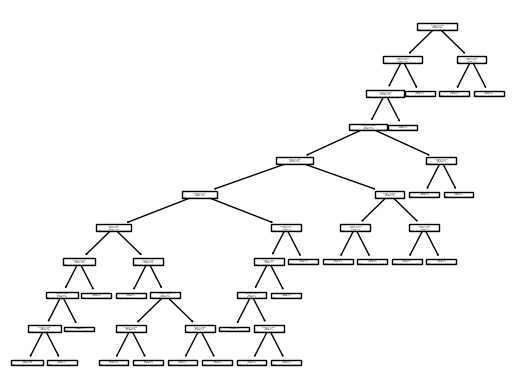

In [77]:
plot_tree(tree);

In [78]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [79]:
sia = SentimentIntensityAnalyzer()

In [88]:
news['compound_sentiment'] = news['lemmatized'].apply(
    lambda x: sia.polarity_scores(x)['compound'])

In [89]:
news.head()

,title,original,clean,stemmed,lemmatized,url,category,compound_sentiment
0,"EVMs never sent to SA, expose source of info: ...",EC has denied Congress MP Randeep Surjewala's ...,ec denied congress mp randeep surjewalas alleg...,ec deni congress mp randeep surjewala alleg ev...,ec denied congress mp randeep surjewalas alleg...,https://inshorts.com/en/news/evms-never-sent-t...,national,0.1280
1,"73.19% voter turnout in K'taka poll, new recor...",Karnataka registered a voter turnout of 73.19%...,karnataka registered voter turnout 7319 assemb...,karnataka regist voter turnout 7319 assembl po...,karnataka registered voter turnout 7319 assemb...,https://inshorts.com/en/news/7319-voter-turnou...,national,-0.1531
2,"No possibility of 3rd front, BJD will go solo ...",After meeting Prime Minister Narendra Modi in ...,meeting prime minister narendra modi delhi odi...,meet prime minist narendra modi delhi odisha c...,meeting prime minister narendra modi delhi odi...,https://inshorts.com/en/news/no-possibility-of...,national,-0.4019
3,'Mocha' to intensify into severe cyclonic stor...,Cyclonic storm 'Mocha' over the southeast Bay ...,cyclonic storm mocha southeast bay bengal expe...,cyclon storm mocha southeast bay bengal expect...,cyclonic storm mocha southeast bay bengal expe...,https://inshorts.com/en/news/mocha-to-intensif...,national,-0.1027
4,HC sets up SIT to probe rape & murder of teen ...,The Calcutta High Court on Thursday set up a s...,calcutta high court thursday set special inves...,calcutta high court thursday set special inves...,calcutta high court thursday set special inves...,https://inshorts.com/en/news/hc-sets-up-sit-to...,national,-0.8957


In [90]:
news.groupby('category')['compound_sentiment'].mean()

category
automobile      -0.060975
business         0.250692
entertainment    0.093404
hatke            0.201736
miscellaneous    0.044788
national        -0.211168
politics         0.349432
science          0.158846
sports           0.059964
startup          0.268454
technology       0.280716
world           -0.340824
Name: compound_sentiment, dtype: float64

In [91]:
news['title_sentiment'] = news['title'].apply(
    lambda x: sia.polarity_scores(x)['compound'])

In [92]:
news.groupby('category')['title_sentiment'].mean()

category
automobile      -0.009958
business         0.017672
entertainment   -0.047680
hatke            0.140960
miscellaneous    0.092096
national        -0.233832
politics         0.201088
science          0.025263
sports          -0.093176
startup         -0.039079
technology      -0.010548
world           -0.186524
Name: title_sentiment, dtype: float64